In [ ]:
%pip install selenium
%pip install beautifulsoup4
%pip install plotly
%pip install seaborn
%pip install scipy
%pip install nbformat

Etap 1: Zbieranie danych

In [1]:
from web_scraping import scrap_data

data = scrap_data()

The chromedriver version (131.0.6778.69) detected in PATH at I:\ChromeDriver\chromedriver.exe might not be compatible with the detected chrome version (132.0.6834.110); currently, chromedriver 132.0.6834.110 is recommended for chrome 132.*, so it is advised to delete the driver in PATH and retry


Etap 2: Czyszczenie danych

In [2]:
import pandas as pd
from cleaning import clean_data

# Dane wej≈õciowe
df = pd.DataFrame(data)

# Przetwarzanie danych
df = clean_data(df)


In [4]:
df['Data wydania'] = pd.to_datetime(df['Data wydania'])

# Ekstrakcja roku z kolumny 'Data wydania' i zapisanie jako nowa kolumna 'Rok wydania'
df['Rok wydania'] = df['Data wydania'].dt.year

In [5]:
display(df)

Tytu≈Ç  \
0                                Cyberpunk 2077   
1    Dying Light 2 Stay Human: Reloaded Edition   
2                                 Marvel Rivals   
3                             Space Engineers 2   
4                                      Among Us   
..                                          ...   
487                                Space Prison   
488                               Nuke Them All   
489                           Aliens vs. Ghosts   
490                             Goodbye Deponia   
491                                  Narita Boy   

                                                  Tagi    Cena Data wydania  \
0    Cyberpunk, Otwarty ≈õwiat, Nago≈õƒá, RPG, Jednoos...   89.55   2020-12-10   
1    Otwarty ≈õwiat, Kooperacja, Zombie, Parkour, Wi...   65.99   2022-02-04   
2    Free to Play, Wieloosobowe, Strzelanka z bohat...    0.00   2024-12-06   
3    Symulatory, Akcja, Strategiczne, Piaskownica, ...  138.99   2025-01-27   
4    Wieloosobowe, Sieciowa kooperacja, Dedukcyjne ...   10.79   2018-11-16   
..                                                 ...     ...          ...   
487  Taktyczne turowe, Komiks, Strategiczne RPG, RP...   70.00   2024-07-18   
488  RTS, RTS akcji, Wojenne, Strategiczne, Taktyka...   91.99   2024-06-19   
489  Akcja, Strzelanka, FPS, 3D, Perspektywa pierws...   34.68   2022-07-06   
490  Przygodowe, Wska≈º i kliknij, Komediowe, Jednoo...    9.19   2013-10-18   
491          Akcja, Retro, Przygodowe, Platformowe, 2D   17.99   2021-03-30   

      Nacechowanie recenzji  Liczba recenzji  Tag_2,5D  Tag_2D  Tag_3D  \
0          Bardzo pozytywne           717578         0       0       0   
1    W wiƒôkszo≈õci pozytywne           137565         0       0       0   
2          Bardzo pozytywne           183495         0       0       0   
3    W wiƒôkszo≈õci pozytywne              638         0       0       0   
4          Bardzo pozytywne           612177         0       0       0   
..                      ...              ...       ...     ...     ...   
487        Bardzo pozytywne              182         0       0       0   
488        Bardzo pozytywne               86         0       0       0   
489        Bardzo pozytywne              379         0       0       1   
490        Bardzo pozytywne             1829         0       0       0   
491        Bardzo pozytywne              969         0       1       0   

     Tag_4X  ...  Tag_ZnaczƒÖce wybory  Tag_Zombie  Tag_Zrƒôczno≈õciowe  \
0         0  ...                    0           0                  0   
1         0  ...                    0           1                  0   
2         0  ...                    0           0                  0   
3         0  ...                    0           0                  0   
4         0  ...                    0           0                  0   
..      ...  ...                  ...         ...                ...   
487       0  ...                    0           0                  0   
488       0  ...                    0           0                  0   
489       0  ...                    0           0                  0   
490       0  ...                    0           0                  0   
491       0  ...                    0           0                  0   

     Tag_≈Åamig≈Ç√≥wki  Tag_≈Åamig≈Ç√≥wki platformowe  Tag_≈Åupy  Tag_≈öledztwo  \
0                 0                           0         0             0   
1                 0                           0         0             0   
2                 0                           0         0             0   
3                 0                           0         0             0   
4                 0                           0         0             0   
..              ...                         ...       ...           ...   
487               0                           0         0             0   
488               0                           0         0             0   
489               0           

Etap 4: Analiza danych

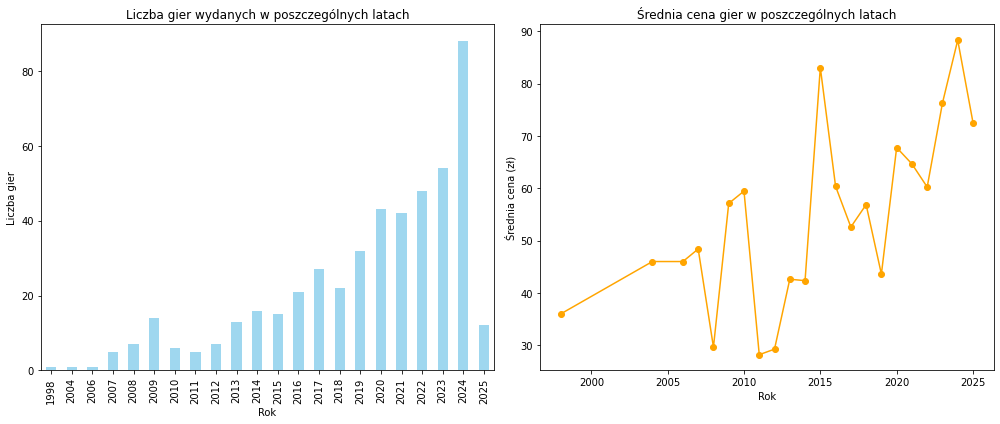

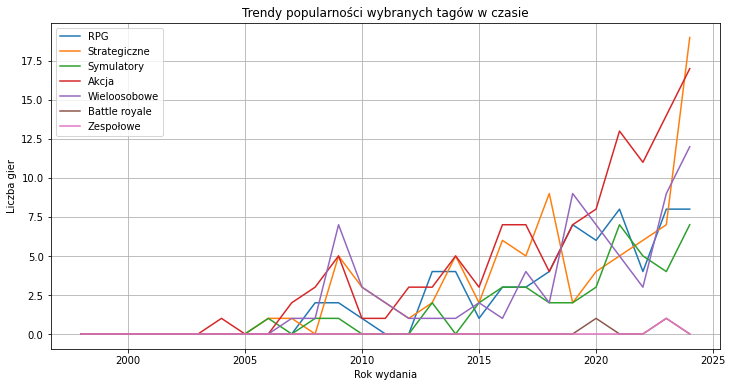

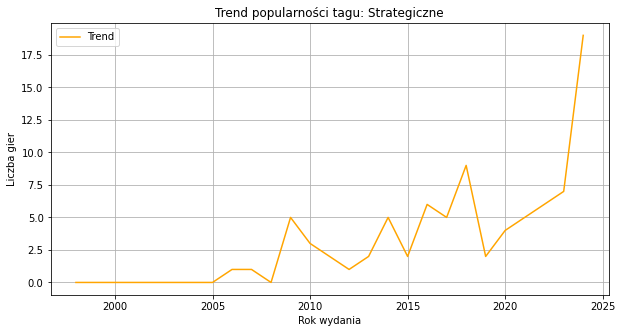

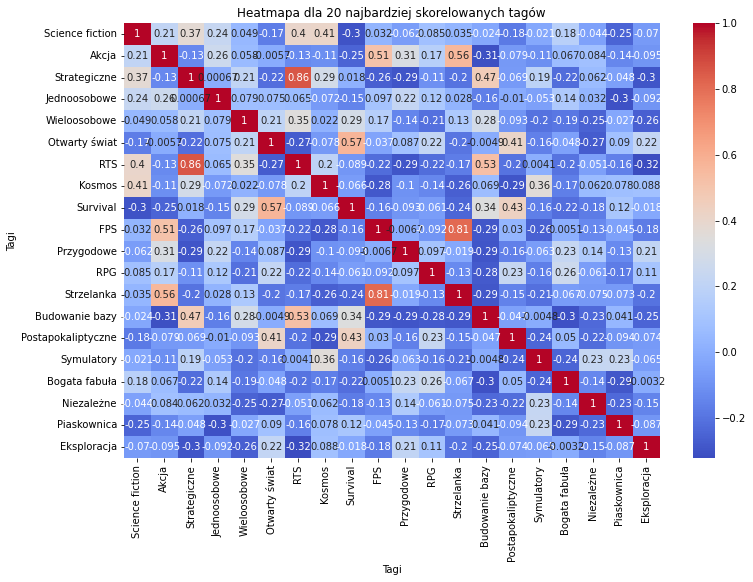

In [6]:
from analyzing import analyze_data

analyze_data(df)

Etap 5: Dashboard

In [92]:
from collections import Counter
import pandas as pd
import plotly.express as px

def prepare_pie_chart_reviews(df, top_n=20):
    # Zliczanie liczby recenzji na tag
    tags = df['Tagi'].apply(lambda x: x.split(', '))
    tag_reviews = Counter()

    for idx, tag_list in enumerate(tags):
        for tag in tag_list:
            tag_reviews[tag] += df.iloc[idx]['Liczba recenzji']

    # Podzia≈Ç na najpopularniejsze tagi i kategoriƒô "Other"
    top_tags = tag_reviews.most_common(top_n)
    other_count = sum(count for tag, count in tag_reviews.items() if tag not in dict(top_tags))
    
    # Przygotowanie danych do DataFrame
    pie_data = pd.DataFrame(top_tags, columns=['Tag', 'Review Count'])
    if other_count > 0:
        other_row = pd.DataFrame([{'Tag': 'Other', 'Review Count': other_count}])
        pie_data = pd.concat([pie_data, other_row], ignore_index=True)
    
    return pie_data

# Przygotowanie danych do wykresu
pie_chart_reviews_data = prepare_pie_chart_reviews(df)

# Wizualizacja
fig0 = px.pie(pie_chart_reviews_data, names='Tag', values='Review Count',
             title='Liczba opinii per tag (z kategoriƒÖ "Other")',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig0.show()


In [93]:
import plotly.express as px

fig1 = px.histogram(df, x='Cena', nbins=20, title='Rozk≈Çad cen gier')
fig1.update_layout(xaxis_title='Cena', yaxis_title='Liczba gier')
fig1.show()


In [94]:
from collections import Counter

# Zliczanie wystƒÖpie≈Ñ tag√≥w
tag_counts = Counter()
for tags in df['Tagi']:
    # Przekszta≈Çcenie stringa w listƒô tag√≥w, zak≈ÇadajƒÖc, ≈ºe sƒÖ oddzielone przecinkami
    tag_list = tags.split(', ')
    tag_counts.update(tag_list)

# Przekszta≈Çcenie wynik√≥w w DataFrame
tag_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count']).sort_values('Count', ascending=False)

# Wizualizacja
fig2 = px.bar(tag_df.head(20), x='Tag', y='Count', title='Najpopularniejsze tagi')
fig2.update_layout(yaxis_title='Liczba gier')
fig2.show()


In [95]:
# 1. Zale≈ºno≈õƒá miƒôdzy cenƒÖ a liczbƒÖ recenzji

import plotly.express as px

# Ustalamy kolejno≈õƒá nacechowania recenzji od najbardziej pozytywnych do najmniej pozytywnych
category_order = ['Przyt≈ÇaczajƒÖco pozytywne', 'Bardzo pozytywne', 'W wiƒôkszo≈õci pozytywne', 'Pozytywne', 'Mieszane', 'W wiƒôkszo≈õci negatywne', 'Przyt≈ÇaczajƒÖco negatywne']

# Tworzymy wykres
fig3 = px.scatter(df, x='Cena', y='Liczba recenzji', color='Nacechowanie recenzji',
                 title='Cena vs. liczba recenzji', labels={'Cena': 'Cena (z≈Ç)', 'Liczba recenzji': 'Liczba recenzji'},
                 hover_data=['Tytu≈Ç'],
                 category_orders={'Nacechowanie recenzji': category_order},
                 color_continuous_scale='RdYlGn',  # Ustawienie palety kolor√≥w
                 color_discrete_map={'Przyt≈ÇaczajƒÖco pozytywne': 'green', 'Bardzo pozytywne': 'lightgreen', 
                                     'W wiƒôkszo≈õci pozytywne': 'yellow', 'Pozytywne': 'yellow', 
                                     'Mieszane': 'orange', 'W wiƒôkszo≈õci negatywne': 'red', 'Przyt≈ÇaczajƒÖco negatywne': 'darkred'})

# Wy≈õwietlamy wykres
fig3.show()



In [96]:
# 2. Zale≈ºno≈õƒá miƒôdzy cenƒÖ a nacechowaniem recenzji

# Mapowanie nacechowania na warto≈õci numeryczne
sentiment_map = {
    'Bardzo pozytywne': 3,
    'Pozytywne': 2,
    'Mieszane': 1,
    'Negatywne': 0
}
df['sentiment_score'] = df['Nacechowanie recenzji'].map(sentiment_map)

# Okre≈õlenie kolejno≈õci dla 'Nacechowanie recenzji'
category_order = ['Przyt≈ÇaczajƒÖco pozytywne', 'Bardzo pozytywne', 'W wiƒôkszo≈õci pozytywne', 'Pozytywne', 'Mieszane', 'W wiƒôkszo≈õci negatywne', 'Przyt≈ÇaczajƒÖco negatywne']

# Scatter plot
fig4 = px.box(df, x='Nacechowanie recenzji', y='Cena', title='Cena w zale≈ºno≈õci od nacechowania recenzji',
             labels={'Cena': 'Cena (z≈Ç)', 'Nacechowanie recenzji': 'Nacechowanie recenzji'},
             category_orders={'Nacechowanie recenzji': category_order})  # Dodajemy sortowanie

fig4.show()



In [97]:
# Upewnij siƒô, ≈ºe Data wydania jest w formacie datetime
df['Data wydania'] = pd.to_datetime(df['Data wydania'], errors='coerce')

# Wyodrƒôbnij rok i dodaj go do nowej kolumny
df['Rok wydania'] = df['Data wydania'].dt.year


In [103]:
# 3. Rozk≈Çad cen w zale≈ºno≈õci od daty wydania
import plotly.express as px
import pandas as pd

# Wykres liczby gier z podzia≈Çem na nacechowanie
# Grupowanie danych: liczba gier w zale≈ºno≈õci od nacechowania recenzji
count_data = df.groupby('Nacechowanie recenzji')['Tytu≈Ç'].count().reset_index()
count_data.rename(columns={'Tytu≈Ç': 'Liczba gier'}, inplace=True)

# Grupowanie danych: liczba gier w zale≈ºno≈õci od roku i nacechowania recenzji
grouped_data = df.groupby(['Rok wydania', 'Nacechowanie recenzji'])['Tytu≈Ç'].count().reset_index()
grouped_data.rename(columns={'Tytu≈Ç': 'Liczba gier'}, inplace=True)

# Wykres s≈Çupkowy z podzia≈Çem
fig5 = px.bar(grouped_data, x='Rok wydania', y='Liczba gier', color='Nacechowanie recenzji', barmode='stack',
             title='Liczba gier w zale≈ºno≈õci od roku wydania i nacechowania recenzji',
             labels={'Rok wydania': 'Rok wydania', 'Liczba gier': 'Liczba gier', 'Nacechowanie recenzji': 'Nacechowanie recenzji'},
             category_orders={'Nacechowanie recenzji': category_order})
fig5.show()

In [21]:
from dashboard import create_dashboard

create_dashboard(df)

In [121]:
# Dodanie fig6 do dashboardu
for trace in fig6.data:  # Iteracja po wszystkich ≈õladach fig6
    dashboard.add_trace(trace, row=3, col=1)



In [123]:
from plotly.subplots import make_subplots

# Tworzenie dashboardu z dynamicznym uk≈Çadem
dashboard = make_subplots(
    rows=3, cols=1,  # Ka≈ºdy wykres w swoim rzƒôdzie
    specs=[
        [{"type": "xy"}],  # RzƒÖd 1: Fig1 zajmuje ca≈ÇƒÖ szeroko≈õƒá
        [{"type": "xy"}],  # RzƒÖd 2: Fig4 zajmuje ca≈ÇƒÖ szeroko≈õƒá
        [{"type": "xy"}]   # RzƒÖd 3: Fig6 z dwiema osiami y
    ],
    subplot_titles=[
        "Liczba gier i recenzji (Fig1)",
        "Popularno≈õƒá tag√≥w w czasie (Fig4)",
        "Tagi z najlepszymi ocenami (Fig6)"
    ]
)

# Dodanie fig1 do pierwszego wiersza
dashboard.add_traces(fig1.data, rows=1, cols=1)

# Dodanie fig4 do drugiego wiersza
dashboard.add_traces(fig4.data, rows=2, cols=1)

# Dodanie fig6 do trzeciego wiersza (z dwiema osiami Y)
for trace in fig6.data:
    dashboard.add_trace(trace, row=3, col=1)

# Ustawienia uk≈Çadu
dashboard.update_layout(
    height=1200,  # Wiƒôksza wysoko≈õƒá dashboardu dla lepszej czytelno≈õci
    width=1200,
    title_text="Dashboard analizy gier",
    showlegend=True
)

# Wy≈õwietlenie dashboardu
dashboard.show()


In [122]:
dashboard.show()

In [112]:
from plotly.subplots import make_subplots

# Tworzenie uk≈Çadu z r√≥≈ºnymi typami wykres√≥w
dashboard = make_subplots(
    rows=2, cols=1, 
    specs=[[{"type": "pie"}], [{"type": "xy"}]],  # Pierwszy wiersz: pie, Drugi wiersz: xy
    subplot_titles=["Liczba opinii per tag", "Top tagi z najlepszymi ocenami"]
)

# Dodanie wykresu ko≈Çowego (fig0) do pierwszego wiersza
dashboard.add_traces(fig0.data, rows=1, cols=1)

# Dodanie wykresu s≈Çupkowego (fig6 = fig_positive) do drugiego wiersza
dashboard.add_traces(fig_positive.data, rows=2, cols=1)

# Ustawienia uk≈Çadu
dashboard.update_layout(height=800, width=1200, title_text="Dashboard analizy gier")
dashboard.show()


In [88]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(cross_table):
    chi2, _, _, _ = chi2_contingency(cross_table)
    n = cross_table.sum().sum()
    phi2 = chi2 / n
    r, k = cross_table.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Eksplodowanie tag√≥w z resetowaniem indeksu
exploded_tags = df[['Nacechowanie recenzji', 'Tagi']].copy()
exploded_tags = exploded_tags.assign(Tag=exploded_tags['Tagi'].str.split(', ')).explode('Tag').reset_index(drop=True)

# Tabela krzy≈ºowa: Nacechowanie recenzji a tagi
cross_table = pd.crosstab(exploded_tags['Nacechowanie recenzji'], exploded_tags['Tag'])

# Obliczenie Cramer's V
cramers_v_value = cramers_v(cross_table)
print(f"Cramer's V: {cramers_v_value:.2f}")

Cramer's V: 0.37


Etap 6: Modelowanie

In [ ]:
# Modelowanie: Zdecyduj, czy problem to klasyfikacja, czy regresja. Wykorzystaj odpowiednie modele uczenia maszynowego (np. drzewa decyzyjne, regresjƒô logistycznƒÖ dla klasyfikacji; regresjƒô liniowƒÖ, lasy losowe dla regresji) z biblioteki `scikit-learn` i oce≈Ñ ich wyniki przy u≈ºyciu takich miar jak dok≈Çadno≈õƒá (accuracy), F1 score lub R-kwadrat (R¬≤), w zale≈ºno≈õci od typu danych i analizy.

# 1. na podstawie tag√≥w, ceny i roku wydania oce≈Ñ, jakie opinie ma gra - klasyfikacja
# 2. na podstawie tag√≥w, opinii, liczby opinii, roku wydania zgadnij, jakƒÖ cenƒô ma gra - regresja

In [125]:
print("Unikalne klasy w danych:", y.unique())
print("Liczba klas w danych:", len(y.unique()))


Unikalne klasy w danych: [0 7 5 2 1 6 4 3]
Liczba klas w danych: 8


In [126]:
# Dopasowanie nazw klas do danych
actual_classes = sorted(y.unique())  # Faktyczne klasy w danych
actual_class_names = [label_encoder.inverse_transform([cls])[0] for cls in actual_classes]  # Odpowiednie nazwy klas

# Aktualizacja raportu klasyfikacji
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred, target_names=actual_class_names))


ValueError: Number of classes, 5, does not match size of target_names, 8. Try specifying the labels parameter

In [133]:
# Przyk≈Çad przekszta≈Çcenia daty na cechy numeryczne
df['Year'] = df['Data wydania'].dt.year  # rok
df['Month'] = df['Data wydania'].dt.month  # miesiƒÖc
df['Day'] = df['Data wydania'].dt.day  # dzie≈Ñ

# Usuniƒôcie oryginalnej kolumny z datƒÖ, je≈õli jest ju≈º niepotrzebna
df.drop(['Data wydania'], axis=1, inplace=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Zak≈ÇadajƒÖc, ≈ºe 'Nazwa_gry' to kolumna tekstowa
if 'Nazwa_gry' in df.columns:
    encoder = LabelEncoder()
    df['Nazwa_gry'] = encoder.fit_transform(df['Nazwa_gry'])

# Zak≈ÇadajƒÖc, ≈ºe inne kolumny mogƒÖ te≈º byƒá kategorialne
df = pd.get_dummies(df)

# Przygotowanie danych
X = df.drop(['Tag_Akcja'], axis=1)  # Usuwamy kolumnƒô Tag_Akcja z cech
y = df['Tag_Akcja']  # Nasza cecha docelowa

# Zak≈ÇadajƒÖc, ≈ºe wszystkie cechy do skalowania sƒÖ ju≈º numeryczne
scaler = StandardScaler()

# Wybieranie tylko kolumn numerycznych do skalowania
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

X_scaled = scaler.fit_transform(X)

# Podzia≈Ç na zbi√≥r treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Budowanie modelu
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predykcja
y_pred = model.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print("Dok≈Çadno≈õƒá:", accuracy)
print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))


Dok≈Çadno≈õƒá: 0.6145833333333334
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.67      0.85      0.75        66
           1       0.23      0.10      0.14        30

    accuracy                           0.61        96
   macro avg       0.45      0.47      0.45        96
weighted avg       0.54      0.61      0.56        96



In [137]:
from sklearn.metrics import roc_curve

# Obliczenie prawdopodobie≈Ñstw
probabilities = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Mo≈ºna zobaczyƒá r√≥≈ºne progi i wybraƒá ten, kt√≥ry daje najlepszy kompromis miƒôdzy FPR a TPR


In [138]:
y_pred = clf.predict(X_test)

In [136]:
from sklearn.linear_model import LogisticRegression

# Ustawienie "balanced" automatycznie dostosowuje wagi odwrotnie proporcjonalnie do czƒôsto≈õci klas
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Dok≈Çadno≈õƒá:", accuracy_score(y_test, y_pred))
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))


Dok≈Çadno≈õƒá: 0.46875

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.71      0.38      0.50        66
           1       0.33      0.67      0.44        30

    accuracy                           0.47        96
   macro avg       0.52      0.52      0.47        96
weighted avg       0.59      0.47      0.48        96



In [155]:
from modeling import predict_tag

# Przyk≈Çadowe u≈ºycie funkcji
target_tag = 'Tag_Strategiczne'  # Przyk≈Çadowy tag do przewidzenia
accuracy, report = predict_tag(df, target_tag)

print("Dok≈Çadno≈õƒá:", accuracy)
print("\nRaport klasyfikacji:\n", report)


Dok≈Çadno≈õƒá: 0.8526315789473684

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91        81
           1       0.50      0.86      0.63        14

    accuracy                           0.85        95
   macro avg       0.74      0.85      0.77        95
weighted avg       0.90      0.85      0.87        95



In [152]:
df

Tytu≈Ç  \
0                                       Cyberpunk 2077   
1           Dying Light 2 Stay Human: Reloaded Edition   
2                                        Marvel Rivals   
3                                    Space Engineers 2   
4                                             Among Us   
..                                                 ...   
480                                              MDK 2   
481                                     Starcom: Nexus   
482                                           Starsand   
483  Odysseus Kosmos and his Robot Quest (Complete ...   
484                                  Aliens vs. Ghosts   

                                                  Tagi    Cena Data wydania  \
0    Cyberpunk, Otwarty ≈õwiat, Nago≈õƒá, RPG, Jednoos...   89.55   2020-12-10   
1    Otwarty ≈õwiat, Kooperacja, Zombie, Parkour, Wi...   65.99   2022-02-04   
2    Free to Play, Wieloosobowe, Strzelanka z bohat...    0.00   2024-12-06   
3    Symulatory, Akcja, Strategiczne, Piaskownica, ...  138.99   2025-01-27   
4    Wieloosobowe, Sieciowa kooperacja, Dedukcyjne ...   10.79   2018-11-16   
..                                                 ...     ...          ...   
480  Strzelanka z perspektywƒÖ trzeciej osoby, Strze...   35.99   2009-09-17   
481   Kosmos, Science fiction, RPG, Akcja, Eksploracja   35.99   2019-12-12   
482  Survivalowe w otwartym ≈õwiecie, Survival, Otwa...   35.99   2022-11-17   
483  Wska≈º i kliknij, Klimatyczne, Pikselowa grafik...   67.99   2017-12-01   
484  Akcja, Strzelanka, FPS, 3D, Perspektywa pierws...   34.68   2022-07-06   

      Nacechowanie recenzji  Liczba recenzji  Tag_2,5D  Tag_2D  Tag_3D  \
0          Bardzo pozytywne           717578         0       0       0   
1    W wiƒôkszo≈õci pozytywne           137565         0       0       0   
2          Bardzo pozytywne           183495         0       0       0   
3    W wiƒôkszo≈õci pozytywne              597         0       0       0   
4          Bardzo pozytywne           612177         0       0       0   
..                      ...              ...       ...     ...     ...   
480        Bardzo pozytywne              190         0       0       0   
481        Bardzo pozytywne             1864         0       0       0   
482  W wiƒôkszo≈õci pozytywne              745         0       0       1   
483        Bardzo pozytywne              114         0       0       0   
484        Bardzo pozytywne              379         0       0       1   

     Tag_4X  ...  Tag_Zespo≈Çowe  Tag_ZnaczƒÖce wybory  Tag_Zombie  \
0         0  ...              0                    0           0   
1         0  ...              0                    0           1   
2         0  ...              0                    0           0   
3         0  ...              0                    0           0   
4         0  ...              0                    0           0   
..      ...  ...            ...                  ...         ...   
480       0  ...              0                    0           0   
481       0  ...              0                    0           0   
482       0  ...              0                    0           0   
483       0  ...              0                    0           0   
484       0  ...              0                    0           0   

     Tag_Zrƒôczno≈õciowe  Tag_≈Åamig≈Ç√≥wki  Tag_≈Åamig≈Ç√≥wki platformowe  Tag_≈Åupy  \
0                    0               0                           0         0   
1                    0               0                           0         0   
2                    0               0                           0         0   
3                    0               0                           0         0   
4                    0               0                           0         0   
..                 ...             ...                         ...       ...   
480                  0               0                           0         0   
481                  0          